<a href="https://colab.research.google.com/github/dyrj/projeto_analise_dados_datagirls/blob/main/pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 6 - Aprendizado de Máquina Supervisionado

🔗 Dataset: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# 1. Classificação:
A partir de um conjunto de características, deve-se prever qual a classe pertence a nova observação.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importando as bibliotecas
import pandas as pd
import numpy as np

In [ ]:
#Carregando os dados
df = pd.read_csv("/content/drive/MyDrive/Data girls/Aula 6 24_06_25/winequality-red.csv", sep=',', header=0)

In [ ]:
#Visualizando as 5 primeiras linhas
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


O código selecionado renomeia as colunas do DataFrame df.

Um dicionário chamado pt_br é criado. As chaves deste dicionário são os nomes originais das colunas em inglês do conjunto de dados, e os valores são os nomes correspondentes em português que você deseja usar.

O método df.rename() é utilizado para realizar a renomeação.
pt_br é passado como o primeiro argumento, fornecendo o mapeamento dos nomes antigos para os novos nomes das colunas.
xis=1 especifica que você deseja renomear colunas (em oposição a linhas, que seria axis=0).
inplace=True modifica o DataFrame df diretamente, sem a necessidade de atribuir o resultado de volta a df. Após a execução desta linha, o DataFrame df terá os nomes das colunas alterados de acordo com o dicionário pt_br.

In [ ]:
#Renomeando as colunas a partir de um dicionário
pt_br = {"fixed acidity": "acidez_fixa",
         "volatile acidity": "acidez_volatil",
         "citric acid": "acido_citrico",
         "residual sugar": "acucar_residual",
         "chlorides": "cloretos",
         "free sulfur dioxide": "dioxido_de_enxofre_livre",
         "total sulfur dioxide": "dioxido_de_enxofre_total",
         "density": "densidade",
         "sulphates": "sulfatos",
         "alcohol": "alcool",
         "quality": "qualidade"}

df.rename(pt_br, axis=1, inplace=True)

In [ ]:
#Estatísticas básicas dos valores numéricos
df.describe()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_de_enxofre_livre,dioxido_de_enxofre_total,densidade,pH,sulfatos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Descrições das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   acidez_fixa               1599 non-null   float64
 1   acidez_volatil            1599 non-null   float64
 2   acido_citrico             1599 non-null   float64
 3   acucar_residual           1599 non-null   float64
 4   cloretos                  1599 non-null   float64
 5   dioxido_de_enxofre_livre  1599 non-null   float64
 6   dioxido_de_enxofre_total  1599 non-null   float64
 7   densidade                 1599 non-null   float64
 8   pH                        1599 non-null   float64
 9   sulfatos                  1599 non-null   float64
 10  alcool                    1599 non-null   float64
 11  qualidade                 1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


A nova coluna qualidade_class terá o valor 1 para vinhos com qualidade entre 6 e 10 (inclusive), e 0 para vinhos com qualidade abaixo de 6. Isso transforma a variável de qualidade original (numérica) em uma variável categórica binária (alta qualidade = 1, baixa qualidade = 0).

In [ ]:
#Construindo a classe qualitativa: alta (1) e baixa (0)
df['qualidade_class'] = df['qualidade'].apply(lambda x: 1 if 6 <= x <= 10 else 0)

# Teste e Treino

Explicação detalhada:

from sklearn.model_selection import train_test_split: Importa a função train_test_split do módulo sklearn.model_selection. Esta função é usada para dividir arrays ou matrizes em subconjuntos aleatórios de treino e teste.
X = df.drop(['qualidade', 'qualidade_class'], axis=1): Cria o DataFrame X contendo as features (variáveis independentes). Ele faz isso removendo as colunas 'qualidade' e 'qualidade_class' do DataFrame original df. axis=1 indica que as colunas estão sendo removidas.
y = df['qualidade_class']: Cria a Series y contendo a variável target (variável dependente) que queremos prever, neste caso, a coluna 'qualidade_class'.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42): Esta é a linha principal que realiza a divisão dos dados.
X e y são os dados de features e target, respectivamente.
test_size=0.25: Especifica que 25% dos dados serão usados para o conjunto de teste, e os 75% restantes para o conjunto de treino.
random_state=42: Define uma semente para o gerador de números aleatórios. Isso garante que a divisão dos dados seja a mesma toda vez que o código for executado, tornando os resultados reproduzíveis.
A função retorna quatro conjuntos de dados: X_train (features para treino), X_test (features para teste), y_train (target para treino) e y_test (target para teste).
print(...): Estas linhas imprimem o tamanho (shape) de cada um dos conjuntos criados (X_train, X_test, y_train, y_test), mostrando o número de linhas e colunas (para os DataFrames) ou o número de elementos (para as Series).
Este código separa as features e o target e depois divide esses dados em conjuntos de treino e teste para que os modelos possam ser treinados em uma parte dos dados e avaliados em uma parte não vista.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['qualidade', 'qualidade_class'], axis=1) # Features
y = df['qualidade_class'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Tamanho do X_train:", X_train.shape)
print("Tamanho do X_test:", X_test.shape)
print("Tamanho do y_train:", y_train.shape)
print("Tamanho do y_test:", y_test.shape)

Tamanho do X_train: (1199, 11)
Tamanho do X_test: (400, 11)
Tamanho do y_train: (1199,)
Tamanho do y_test: (400,)


# 1.1 Árvore de decisão

Obs: Não deixe de conferir a documentação para maiores informações deste modelo! https://scikit-learn.org/stable/modules/tree.html#decision-trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Explicação detalhada:

Criando o modelo de Árvore de Decisão: Este comentário indica a próxima ação.
modelo_arvore = DecisionTreeClassifier(random_state=42): Cria uma instância do modelo DecisionTreeClassifier.
random_state=42: Define uma semente para o gerador de números aleatórios interno. Isso garante que a árvore de decisão construída seja a mesma toda vez que o código for executado, tornando os resultados reproduzíveis.

Treinando o modelo: Este comentário indica a próxima ação.
modelo_arvore.fit(X_train, y_train): Treina o modelo de Árvore de Decisão.
X_train: São as features (variáveis independentes) do conjunto de treino.
y_train: É o target (variável dependente) do conjunto de treino. O modelo aprende a relação entre as features em X_train e os rótulos de classe em y_train.

Testando o modelo: Este comentário indica a próxima ação.
y_pred_arvore = modelo_arvore.predict(X_test): Usa o modelo treinado (modelo_arvore) para fazer previsões no conjunto de teste (X_test).
X_test: São as features do conjunto de teste. O modelo prevê os rótulos de classe para estas instâncias.
y_pred_arvore: Armazena as previsões feitas pelo modelo no conjunto de teste.

Este código configura um modelo de Árvore de Decisão, ensina a ele a partir dos dados de treino e depois o utiliza para prever a classe dos dados de teste. As previsões (y_pred_arvore) serão comparadas com os valores reais (y_test) nas etapas de avaliação para medir o desempenho do modelo.

In [ ]:
# Criando o modelo de Árvore de Decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
modelo_arvore.fit(X_train, y_train)

# Testando o modelo
y_pred_arvore = modelo_arvore.predict(X_test)

Explicação detalhada:

plt.figure(figsize=(20, 10)): Cria uma nova figura para o plot com um tamanho especificado (20 polegadas de largura por 10 polegadas de altura). Isso é feito para garantir que a árvore seja grande o suficiente para ser legível.
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=[str(q) for q in sorted(y.unique())]): Esta é a função principal que plota a árvore.
modelo_arvore: O modelo de Árvore de Decisão treinado que você deseja visualizar.
filled=True: Colore os nós da árvore para indicar a classe majoritária em cada nó.
feature_names=X.columns: Fornece os nomes das features (colunas de entrada) para serem exibidos nos nós da árvore. Isso torna a interpretação da árvore mais fácil.
class_names=[str(q) for q in sorted(y.unique())]: Fornece os nomes das classes target para serem exibidos nos nós da árvore. Neste caso, como você transformou a qualidade em 0s e 1s, ele exibirá "0" e "1". O [str(q) for q in sorted(y.unique())] garante que os nomes das classes sejam strings e estejam na ordem correta.
plt.show(): Exibe a figura da árvore de decisão gerada.
Este código gera um gráfico da árvore de decisão treinada, mostrando como as decisões são tomadas com base nas features para classificar os vinhos em alta ou baixa qualidade. A visualização ajuda a entender a lógica do modelo.

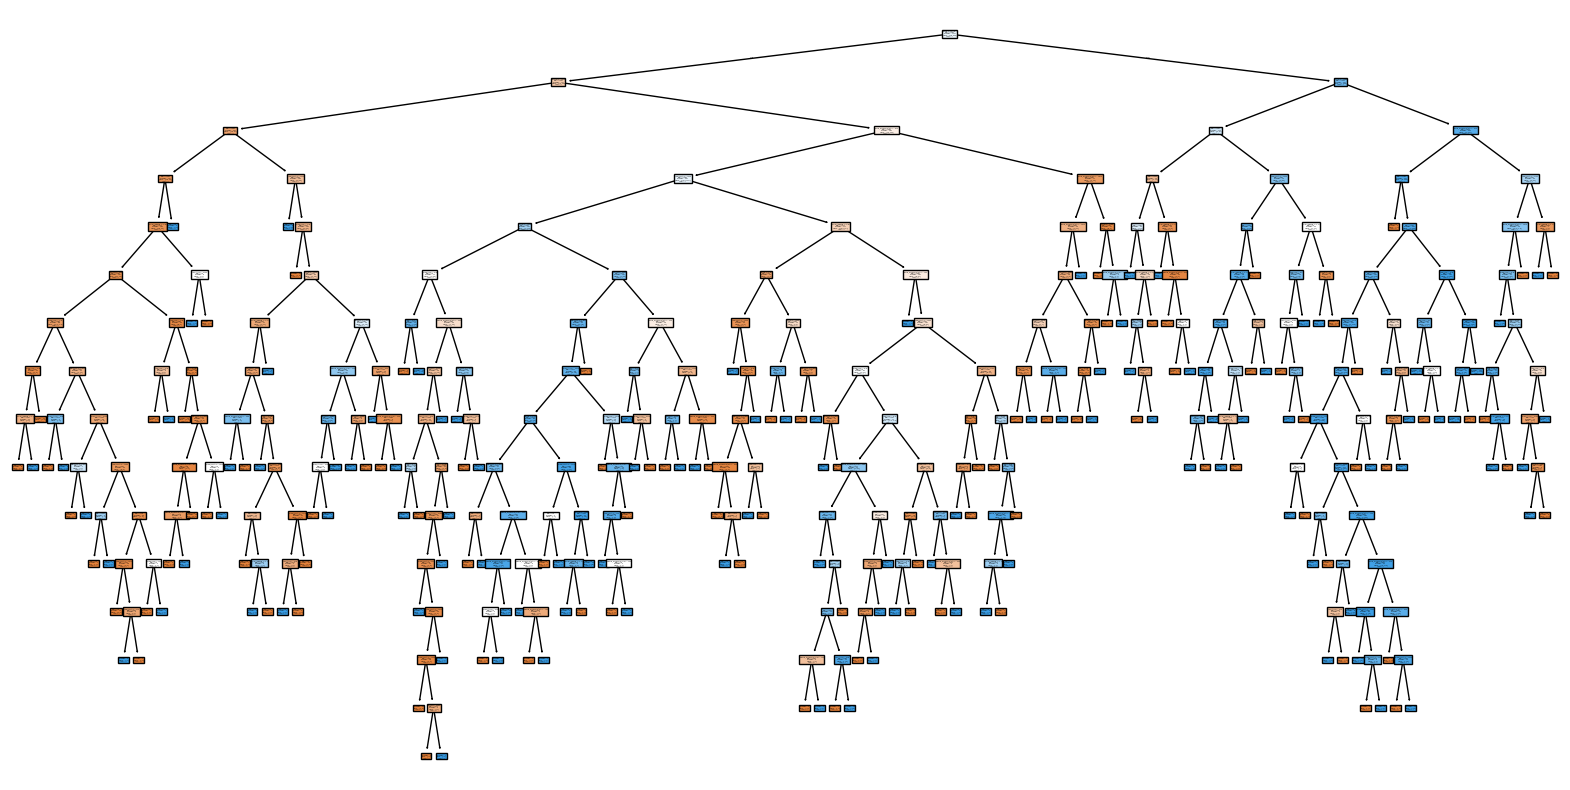

In [ ]:
# Visualizando a árvore de decisão
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=X.columns, class_names=[str(q) for q in sorted(y.unique())])
plt.show()

# 1.2 KNN

Obs: Não deixe de conferir a documentação para maiores informações deste modelo! https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

O código importa a classe KNeighborsClassifier da biblioteca scikit-learn, que é utilizada para implementar o algoritmo K-Nearest Neighbors (KNN) para tarefas de classificação.

Em resumo:
from sklearn.neighbors import KNeighborsClassifier: Esta linha importa especificamente a ferramenta KNeighborsClassifier que você usará para criar e trabalhar com um modelo KNN.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

O código selecionado cria, treina e realiza previsões usando o modelo K-Nearest Neighbors (KNN).

Veja a explicação detalhada:

O número de vizinhos (n_neighbors) é um hiperparâmetro que pode ser ajustado (atenção na próxima aula): Este comentário destaca que n_neighbors é um parâmetro importante que afeta o desempenho do modelo e que será abordado em mais detalhes posteriormente.
modelo_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean'): Cria uma instância do modelo KNeighborsClassifier.
n_neighbors=5: Define o número de vizinhos mais próximos a serem considerados ao fazer uma previsão. Neste caso, são 5 vizinhos.
metric='euclidean': Especifica a métrica de distância a ser usada para encontrar os vizinhos mais próximos. A distância euclidiana é uma escolha comum.
Treinando o modelo KNN: Este comentário indica a próxima ação.
modelo_knn.fit(X_train, y_train): Treina o modelo KNN.
X_train: São as features do conjunto de treino.
y_train: É o target do conjunto de treino. O modelo "aprende" a partir desses dados.
Fazendo previsões: Este comentário indica a próxima ação.
y_pred_knn = modelo_knn.predict(X_test): Usa o modelo treinado (modelo_knn) para fazer previsões no conjunto de teste (X_test).
X_test: São as features do conjunto de teste. O modelo prevê os rótulos de classe para estas instâncias com base nos n_neighbors mais próximos no conjunto de treino.
y_pred_knn: Armazena as previsões feitas pelo modelo no conjunto de teste.
Em resumo, este código inicializa um modelo KNN com 5 vizinhos e a métrica euclidiana, treina o modelo com os dados de treino e, em seguida, faz previsões sobre os dados de teste. As previsões (y_pred_knn) serão usadas para avaliar o desempenho do modelo nas próximas etapas.

In [ ]:
# O número de vizinhos (n_neighbors) é um hiperparâmetro que pode ser ajustado (atenção na próxima aula)
modelo_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Treinando o modelo KNN
modelo_knn.fit(X_train, y_train)

# Fazendo previsões
y_pred_knn = modelo_knn.predict(X_test)

O melhor número de vizinhos (K) encontrado é: 1


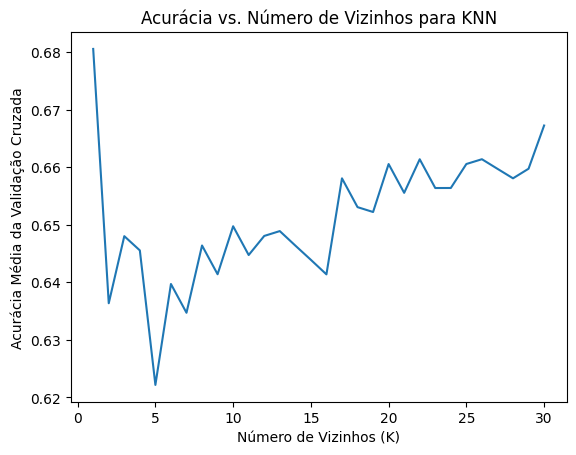

In [ ]:
from sklearn.model_selection import cross_val_score

# Lista para armazenar a média das acurácias para cada valor de K
cv_scores = []

# Valores de K a serem testados (geralmente um intervalo de 1 a um número razoável)
k_range = range(1, 31) # Testando K de 1 a 30

# Loop para testar cada valor de K
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Realizando a validação cruzada com 5 folds
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # Armazenando a média das acurácias para este K
    cv_scores.append(scores.mean())

# Encontrando o K com a melhor acurácia média
best_k = k_range[cv_scores.index(max(cv_scores))]

print(f"O melhor número de vizinhos (K) encontrado é: {best_k}")

# Opcional: Visualizar a relação entre K e a acurácia
plt.plot(k_range, cv_scores)
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia Média da Validação Cruzada')
plt.title('Acurácia vs. Número de Vizinhos para KNN')
plt.show()

# 2. Regressão
A partir de um conjunto de características, deve-se prever o valor contínuo que possui a nova observação.

Obs: Não deixe de conferir a documentação da biblioteca. Temos outras funções interessantes como o coeficiente e o intercepto, além de uma explicação da regressão. Confira aqui ➡️ https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

In [ ]:
from sklearn.linear_model import LinearRegression

Prepara os dados especificamente para um modelo de Regressão Linear, separando as features e o target (que, neste caso, é a qualidade original, não a classe binária).

Explicação detalhada:

X1 = df.drop(['qualidade', 'qualidade_class'], axis=1): Cria o DataFrame X1 contendo as features (variáveis independentes) para o modelo de regressão. Assim como antes, ele remove as colunas 'qualidade' e 'qualidade_class' do DataFrame original df. axis=1 indica que as colunas estão sendo removidas.
y1 = df['qualidade']: Cria a Series y1 contendo a variável target (variável dependente) para o modelo de regressão. Note que aqui o target é a coluna 'qualidade' original (valores numéricos de 3 a 8), e não a 'qualidade_class' binária usada para classificação.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42): Esta linha divide os dados de features (X1) e target (y1) em conjuntos de treino e teste, usando a mesma configuração de antes (25% para teste, semente aleatória 42).
X1_train: Features para treino (regressão).
X1_test: Features para teste (regressão).
y1_train: Target para treino (regressão - qualidade numérica).
y1_test: Target para teste (regressão - qualidade numérica).
print(...): Imprime o tamanho (shape) de cada um dos conjuntos criados, confirmando que a divisão ocorreu corretamente.
Este código realiza a divisão dos dados especificamente para a tarefa de regressão, onde o objetivo é prever o valor numérico da qualidade do vinho (qualidade), em vez de classificá-lo em "alta" ou "baixa" qualidade.

In [ ]:
X1 = df.drop(['qualidade', 'qualidade_class'], axis=1) # Features
y1 = df['qualidade'] # Target

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

print("Tamanho do X_train:", X1_train.shape)
print("Tamanho do X_test:", X1_test.shape)
print("Tamanho do y_train:", y1_train.shape)
print("Tamanho do y_test:", y1_test.shape)

Tamanho do X_train: (1199, 11)
Tamanho do X_test: (400, 11)
Tamanho do y_train: (1199,)
Tamanho do y_test: (400,)


In [ ]:
# Criando o modelo de Regressão Linear
modelo_regressao = LinearRegression()

# Treinando o modelo
modelo_regressao.fit(X1_train, y1_train)

# Realizando previsões no conjunto de teste
y_pred_regressao = modelo_regressao.predict(X1_test)

Gera gráficos de dispersão para visualizar a relação entre cada feature (característica do vinho) e a qualidade do vinho.

Explicação detalhada:

plt.figure(figsize=(16, 10)): Cria uma nova figura para o conjunto de subplots com um tamanho especificado (16 polegadas de largura por 10 polegadas de altura). Isso ajuda a garantir que os gráficos individuais tenham um bom tamanho para visualização.
for i, col in enumerate(df.columns[:-1]):: Inicia um loop que itera sobre todas as colunas do DataFrame df, exceto a última coluna (que é 'qualidade_class', a classe binária, já que o objetivo é visualizar a relação com a qualidade numérica). enumerate fornece um índice (i) e o nome da coluna (col) a cada iteração.
plt.subplot(3, 4, i + 1): Cria um subplot dentro da figura atual. (3, 4, i + 1) significa que a figura será organizada em uma grade de 3 linhas por 4 colunas, e o gráfico atual será colocado na posição i + 1.
plt.scatter(df[col], df['qualidade'], alpha=0.5): Cria um gráfico de dispersão.
df[col]: Os valores da coluna atual do loop (a feature).
df['qualidade']: Os valores da coluna 'qualidade' (o target numérico).
alpha=0.5: Define a transparência dos pontos, útil quando há muitos pontos que se sobrepõem.
plt.title(f'{col} vs Qualidade'): Define o título do subplot, mostrando qual feature está sendo comparada com a qualidade.
plt.xlabel(col): Define o rótulo do eixo x como o nome da feature atual.
plt.ylabel('Qualidade'): Define o rótulo do eixo y como 'Qualidade'.
plt.tight_layout(): Ajusta automaticamente o layout dos subplots para evitar sobreposição e garantir que os rótulos e títulos sejam visíveis.
plt.show(): Exibe a figura com todos os subplots gerados.
Este código cria uma série de gráficos de dispersão, um para cada feature do conjunto de dados (exceto as colunas de qualidade), plotando os valores da feature contra os valores da qualidade. Isso permite visualizar graficamente como cada característica individual se relaciona com a qualidade percebida do vinho.

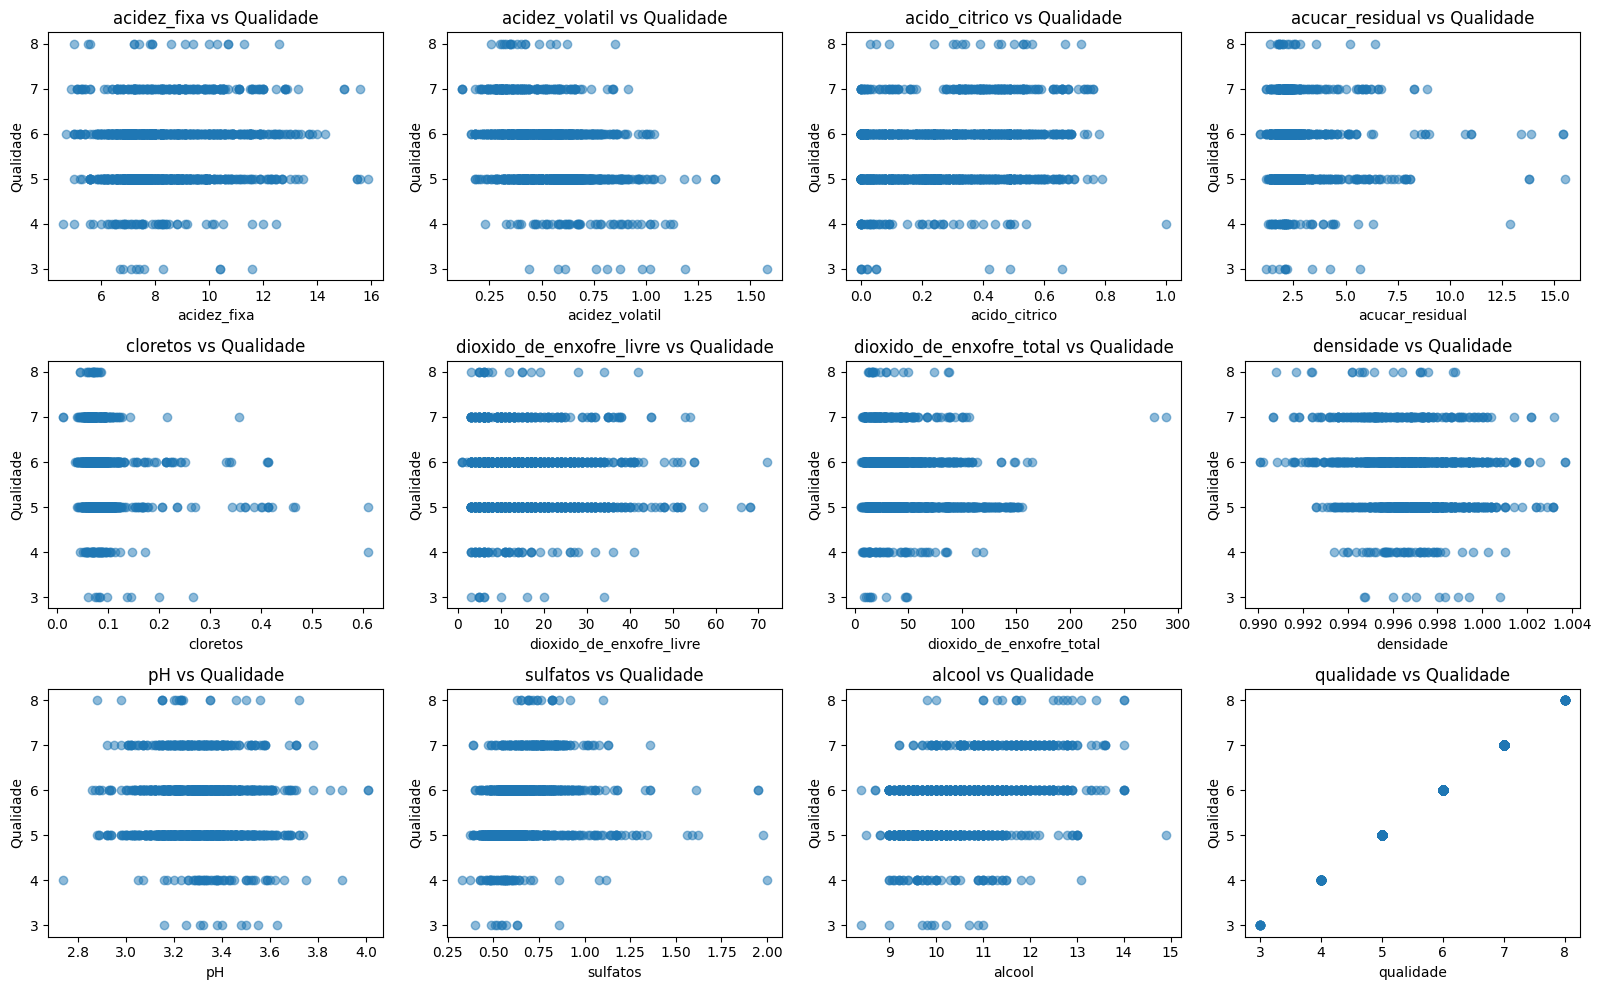

In [ ]:
# Visualizar a relação entre as variáveis e a qualidade
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]): # Exclui a coluna 'qualidade'
    plt.subplot(3, 4, i + 1) # Cria subplots (3 linhas, 4 colunas)
    plt.scatter(df[col], df['qualidade'], alpha=0.5)
    plt.title(f'{col} vs Qualidade')
    plt.xlabel(col)
    plt.ylabel('Qualidade')
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# 3. Métricas de avaliação

Obs: Não deixe de conferir a documentação da biblioteca. https://scikit-learn.org/stable/modules/model_evaluation.html#metrics-and-scoring-quantifying-the-quality-of-predictions

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, r2_score, mean_absolute_error, root_mean_squared_error

Calcula e imprime várias métricas de avaliação para os modelos de Classificação (Árvore de Decisão e KNN) que foram treinados anteriormente.

Explicação detalhada:

Métricas para Árvore de Decisão:

print("Métricas para Árvore de Decisão:"): Imprime um cabeçalho para as métricas da Árvore de Decisão.
print("Acurácia:", accuracy_score(y_test, y_pred_arvore)): Calcula e imprime a acurácia do modelo. A acurácia mede a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões.
y_test: Os rótulos reais do conjunto de teste.
y_pred_arvore: As previsões feitas pelo modelo de Árvore de Decisão no conjunto de teste.
print("Precisão:", precision_score(y_test, y_pred_arvore)): Calcula e imprime a precisão do modelo. A precisão mede a proporção de verdadeiros positivos em relação a todos os resultados positivos previstos (verdadeiros positivos + falsos positivos). É útil quando o custo de um falso positivo é alto.
print("Recall:", recall_score(y_test, y_pred_arvore)): Calcula e imprime o recall (ou sensibilidade) do modelo. O recall mede a proporção de verdadeiros positivos em relação a todos os casos positivos reais (verdadeiros positivos + falsos negativos). É útil quando o custo de um falso negativo é alto.
print("F1 Score:", f1_score(y_test, y_pred_arvore)): Calcula e imprime o F1 Score. O F1 Score é a média harmônica da precisão e do recall. É uma métrica útil quando você precisa de um equilíbrio entre precisão e recall, especialmente em conjuntos de dados desbalanceados.
print("\nClassification Report para Árvore de Decisão:\n", classification_report(y_test, y_pred_arvore)): Gera e imprime um relatório de classificação completo. Este relatório inclui precisão, recall e F1 Score para cada classe individualmente, além de métricas agregadas como acurácia, macro average e weighted average.
Métricas para KNN: As mesmas métricas (Acurácia, Precisão, Recall, F1 Score e Classification Report) são calculadas e impressas para o modelo KNN, utilizando as previsões feitas por ele (y_pred_knn) e comparando-as com os rótulos reais do conjunto de teste (y_test).

Este código fornece uma avaliação quantitativa do desempenho dos modelos de classificação (Árvore de Decisão e KNN) no conjunto de teste, usando métricas comuns para entender o quão bem eles conseguiram prever a classe de qualidade do vinho.

In [ ]:
# Métricas para Árvore de Decisão
print("Métricas para Árvore de Decisão:")
print("Acurácia:", accuracy_score(y_test, y_pred_arvore))
print("Precisão:", precision_score(y_test, y_pred_arvore))
print("Recall:", recall_score(y_test, y_pred_arvore))
print("F1 Score:", f1_score(y_test, y_pred_arvore))
print("\nClassification Report para Árvore de Decisão:\n", classification_report(y_test, y_pred_arvore))

# Métricas para KNN
print("\nMétricas para KNN:")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Precisão:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("\nClassification Report para KNN:\n", classification_report(y_test, y_pred_knn))

Métricas para Árvore de Decisão:
Acurácia: 0.7175
Precisão: 0.7422222222222222
Recall: 0.7522522522522522
F1 Score: 0.7472035794183445

Classification Report para Árvore de Decisão:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       178
           1       0.74      0.75      0.75       222

    accuracy                           0.72       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.72      0.72      0.72       400


Métricas para KNN:
Acurácia: 0.62
Precisão: 0.6605504587155964
Recall: 0.6486486486486487
F1 Score: 0.6545454545454545

Classification Report para KNN:
               precision    recall  f1-score   support

           0       0.57      0.58      0.58       178
           1       0.66      0.65      0.65       222

    accuracy                           0.62       400
   macro avg       0.62      0.62      0.62       400
weighted avg       0.62      0.62      0.62       400



Gera e plota as Matrizes de Confusão para os modelos de Classificação (Árvore de Decisão e KNN) que foram treinados.

Explicação detalhada:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay: Importa as funções necessárias para calcular e exibir a matriz de confusão.
Matriz de Confusão para Árvore de Decisão:
cm_arvore = confusion_matrix(y_test, y_pred_arvore): Calcula a matriz de confusão comparando os rótulos reais (y_test) com as previsões do modelo de Árvore de Decisão (y_pred_arvore).
disp_arvore = ConfusionMatrixDisplay(confusion_matrix=cm_arvore, display_labels=sorted(y.unique())): Cria um objeto ConfusionMatrixDisplay para facilitar a visualização da matriz. display_labels define os rótulos que serão exibidos nos eixos (neste caso, "0" e "1").
disp_arvore.plot(): Gera o plot da matriz de confusão.
plt.title("Matriz de Confusão - Árvore de Decisão"): Define o título do gráfico.
plt.show(): Exibe o gráfico da matriz de confusão para a Árvore de Decisão.
Matriz de Confusão para KNN:
As mesmas etapas são repetidas para o modelo KNN, calculando a matriz de confusão (cm_knn) com base nas previsões do KNN (y_pred_knn) e exibindo-a com o título apropriado.
A Matriz de Confusão é uma tabela que resume o desempenho de um modelo de classificação. Ela mostra o número de previsões corretas e incorretas, divididas por classe. Observando a matriz, você pode ver quantos vinhos de alta qualidade foram corretamente previstos como alta qualidade (Verdadeiros Positivos), quantos vinhos de baixa qualidade foram incorretamente previstos como alta qualidade (Falsos Positivos), e assim por diante. Isso ajuda a entender os tipos de erros que cada modelo está cometendo.

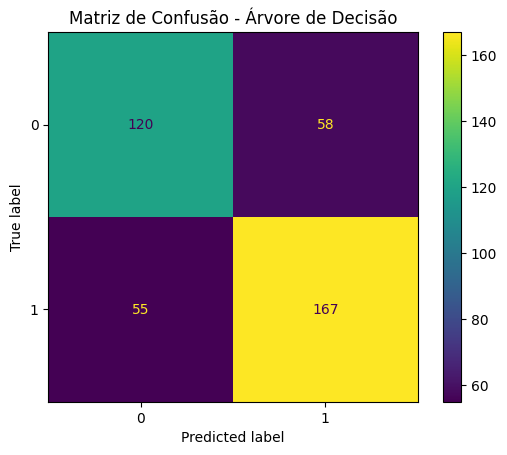

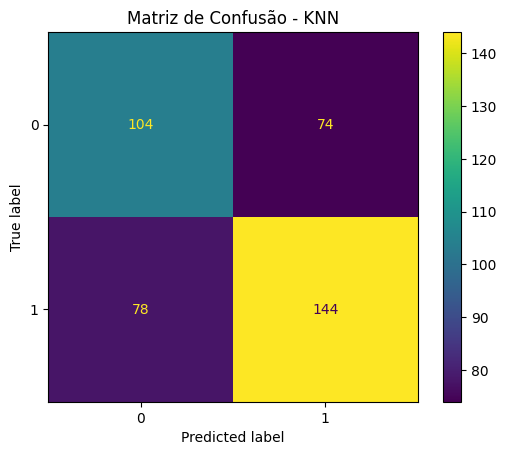

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matriz de Confusão para Árvore de Decisão
cm_arvore = confusion_matrix(y_test, y_pred_arvore)
disp_arvore = ConfusionMatrixDisplay(confusion_matrix=cm_arvore, display_labels=sorted(y.unique()))
disp_arvore.plot()
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()

# Matriz de Confusão para KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=sorted(y.unique()))
disp_knn.plot()
plt.title("Matriz de Confusão - KNN")
plt.show()


Calcula e imprime várias métricas de avaliação para o modelo de Regressão Linear que foi treinado anteriormente.

Explicação detalhada:

print("\nMétricas para Regressão Linear:"): Imprime um cabeçalho para as métricas de regressão.
print("R² Score:", r2_score(y1_test, y_pred_regressao)): Calcula e imprime o R² Score (Coeficiente de Determinação). O R² Score mede a proporção da variância na variável dependente que é previsível a partir das variáveis independentes. Um valor mais próximo de 1 indica que o modelo explica uma maior proporção da variabilidade dos dados.
y1_test: Os valores reais da qualidade do vinho no conjunto de teste.
y_pred_regressao: As previsões feitas pelo modelo de Regressão Linear no conjunto de teste.
print("Mean Absolute Error:", mean_absolute_error(y1_test, y_pred_regressao)): Calcula e imprime o Erro Médio Absoluto (MAE). O MAE é a média dos valores absolutos dos erros de previsão. Ele mede a magnitude média dos erros em um conjunto de previsões, sem considerar a direção. Um valor menor indica um melhor desempenho.
print("Root Mean Squared Error:", root_mean_squared_error(y1_test, y_pred_regressao)): Calcula e imprime a Raiz do Erro Quadrático Médio (RMSE). O RMSE é a raiz quadrada da média dos erros quadrados. É uma métrica comum para avaliar a precisão de modelos de regressão e dá mais peso a erros maiores em comparação com o MAE. Um valor menor indica um melhor desempenho.
Este código fornece uma avaliação quantitativa do desempenho do modelo de Regressão Linear no conjunto de teste, utilizando métricas comuns para entender o quão bem ele conseguiu prever o valor numérico da qualidade do vinho.

In [ ]:
# Métricas para Regressão Linear
print("\nMétricas para Regressão Linear:")
print("R² Score:", r2_score(y1_test, y_pred_regressao))
print("Mean Absolute Error:", mean_absolute_error(y1_test, y_pred_regressao))
print("Root Mean Squared Error:", root_mean_squared_error(y1_test, y_pred_regressao))


Métricas para Regressão Linear:
R² Score: 0.3722831200821226
Mean Absolute Error: 0.49987991229232975
Root Mean Squared Error: 0.6231386191584497


Um resumo das etapas e do código:

Introdução ao Projeto: O notebook começa apresentando o tema (Aprendizado de Máquina Supervisionado) e o dataset utilizado (qualidade de vinho tinto). Ele define o objetivo principal: classificação da qualidade do vinho.
Configuração e Carregamento dos Dados:
Montagem do Google Drive para acessar o arquivo do dataset.
Importação das bibliotecas necessárias (pandas e numpy).
Carregamento do dataset winequality-red.csv em um DataFrame pandas (df).
Preparação e Exploração Inicial dos Dados:
Visualização das primeiras linhas do DataFrame para entender a estrutura dos dados.
Renomeação das colunas do inglês para o português usando um dicionário para facilitar a interpretação.
Exibição das estatísticas básicas dos valores numéricos (df.describe()) para ter uma ideia da distribuição dos dados em cada coluna.
Obtenção de informações sobre o DataFrame (df.info()), como o número de entradas, colunas, tipos de dados e contagem de valores não nulos, para verificar a integridade dos dados.
Engenharia de Features (Criação da Classe de Qualidade):
Criação de uma nova coluna chamada qualidade_class. Esta coluna transforma a variável de qualidade numérica original em uma variável binária: 1 para vinhos de alta qualidade (qualidade entre 6 e 10) e 0 para vinhos de baixa qualidade (qualidade abaixo de 6). Isso é feito para a tarefa de classificação.
Divisão dos Dados (Teste e Treino):
Separação das features (variáveis independentes, X) e do target (variável dependente, y). Para a classificação, o target é a coluna qualidade_class.
Divisão dos dados em conjuntos de treino (75%) e teste (25%) usando train_test_split. O conjunto de treino é usado para "ensinar" o modelo, e o conjunto de teste é usado para avaliar seu desempenho em dados que ele nunca viu antes.
Modelos de Classificação:
Árvore de Decisão:
Importação da classe DecisionTreeClassifier.
Criação e treinamento de um modelo de Árvore de Decisão (modelo_arvore) usando os dados de treino (X_train, y_train).
Realização de previsões (y_pred_arvore) no conjunto de teste (X_test).
Visualização da árvore de decisão treinada para entender o processo de decisão do modelo.
KNN (K-Nearest Neighbors):
Importação da classe KNeighborsClassifier.
Criação e treinamento de um modelo KNN (modelo_knn) usando os dados de treino, especificando n_neighbors (número de vizinhos) e a métrica de distância (euclidiana).
Realização de previsões (y_pred_knn) no conjunto de teste.
Realização de Validação Cruzada para encontrar o melhor valor de K (número de vizinhos) para o modelo KNN e visualização da relação entre K e a acurácia média.
Preparação dos Dados para Regressão:
Separação das features (X1) e do target (y1) especificamente para a tarefa de regressão. O target aqui é a coluna qualidade original (numérica).
Divisão dos dados em conjuntos de treino (X1_train, y1_train) e teste (X1_test, y1_test) para regressão.
Modelo de Regressão:
Importação da classe LinearRegression.
Criação e treinamento de um modelo de Regressão Linear (modelo_regressao) usando os dados de treino de regressão (X1_train, y1_train).
Realização de previsões (y_pred_regressao) no conjunto de teste de regressão (X1_test).
Visualização da Relação entre Features e Qualidade (Regressão):
Geração de gráficos de dispersão para cada feature (exceto as colunas de qualidade) versus a qualidade numérica para visualizar graficamente as relações entre elas.
Métricas de Avaliação:
Importação das funções de métricas de avaliação para classificação (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay) e regressão (r2_score, mean_absolute_error, root_mean_squared_error).
Cálculo e impressão das métricas de avaliação (Acurácia, Precisão, Recall, F1 Score, Classification Report) para os modelos de classificação (Árvore de Decisão e KNN) usando as previsões no conjunto de teste (y_test e y_pred_arvore/y_pred_knn).
Geração e plotagem das Matrizes de Confusão para os modelos de Classificação para entender os tipos de erros.
Cálculo e impressão das métricas de avaliação (R² Score, MAE, RMSE) para o modelo de Regressão Linear usando as previsões no conjunto de teste (y1_test e y_pred_regressao).
Em resumo, o notebook demonstra o processo de carregamento, preparação, exploração, modelagem (classificação com Árvore de Decisão e KNN, e regressão linear) e avaliação de modelos de machine learning utilizando o dataset de qualidade de vinho. Ele compara o desempenho de diferentes modelos para a tarefa de classificação e avalia o modelo de regressão.

# Agradecimento pela aula Ana Mioto

